In [1]:
# 数値計算やデータフレーム操作に関するライブラリをインポートする
import numpy as np
import pandas as pd

In [2]:
# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt
# Jupyter notebook表示のため
# %matplotlib inline

In [3]:
#機械学習のライブラリ
import sklearn as skl
from sklearn.decomposition import PCA #主成分分析器

In [4]:
# データの読み込みと確認
DATA = "/content/drive/MyDrive/Wine_Variety_Prediction/train.tsv"
df = pd.read_table(DATA, sep="\t", index_col=0)

In [5]:
df.head()

,Y,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
id,,,,,,,,,,,,,,
0,3,12.36,3.83,2.38,21.0,88,2.30,0.92,0.50,1.04,7.65,0.56,1.58,520
1,2,12.42,4.43,2.73,26.5,102,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365
3,1,13.05,1.77,2.10,17.0,107,3.00,3.00,0.28,2.03,5.04,0.88,3.35,885
6,1,13.05,1.65,2.55,18.0,98,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105
9,1,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830


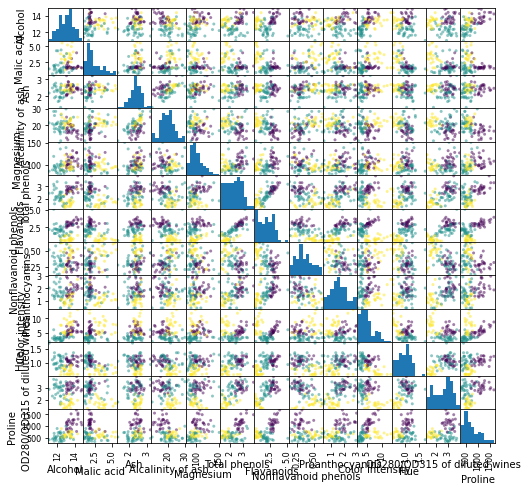

In [6]:
from pandas import plotting 
plotting.scatter_matrix(df.iloc[:, 1:], figsize=(8, 8), c=list(df.iloc[:, 0]), alpha=0.5, )
plt.show()

In [7]:
# scikit-learnで主成分分析
# 行列の標準化
dfs = df.iloc[:, 1:].apply(lambda x: (x-x.mean())/x.std(), axis=0)
dfs.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
id,,,,,,,,,,,,,
0,-0.774041,1.359886,-0.025040,0.346277,-0.876447,-0.033375,-1.123642,1.099123,-0.896811,1.080650,-1.775806,-1.472516,-0.708199
1,-0.701142,1.886370,1.121997,1.724349,0.103852,-0.206069,0.081347,0.560371,0.190559,-1.268134,-0.210126,0.740699,-1.195412
3,0.064299,-0.447708,-0.942669,-0.655956,0.453959,1.175484,0.947744,-0.594097,0.709899,-0.019947,-0.384090,1.071244,0.439110
6,0.064299,-0.553005,0.532092,-0.405398,-0.176234,0.225667,0.380105,-0.517133,-0.247635,-0.353078,0.659697,-0.135964,1.130639
9,0.064299,-0.202016,2.727848,1.348511,1.644322,0.536516,0.629069,0.868229,0.531376,-0.635607,0.703188,0.855671,0.266228


In [8]:
# 主成分分析の実行
pca = PCA()
pca.fit(dfs)
# データを主成分空間に写像
feature = pca.transform(dfs)

In [9]:
# 主成分得点
pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(dfs.columns))]).head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,-3.155341,0.837300,-0.065343,-0.841794,0.348980,0.222692,-0.035435,-1.197122,0.549166,0.532456,0.078012,-0.154784,0.115237
1,-1.141852,-0.281402,2.738322,-0.125637,0.851977,-1.395282,0.740963,0.405964,-0.135818,0.051810,-0.020839,-0.001761,-0.130837
2,2.006080,-0.079378,-0.464911,-0.299704,0.814141,0.115669,0.086663,-0.579410,-0.255617,0.847161,-0.343481,0.124981,-0.286495
3,1.059282,-0.026349,-0.243426,0.147043,-0.758359,-0.247891,-0.499158,-0.123069,0.517866,-0.801060,-0.146966,-0.355215,-0.084578
4,1.133627,1.177319,3.032236,1.275770,-0.933400,-0.426594,0.329483,0.074069,-0.659531,-0.531300,-0.088592,-0.117576,0.173845


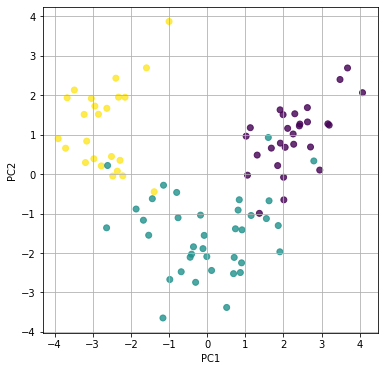

In [12]:
# 第一主成分と第二主成分でプロットする
# df.iloc[:, 0]は'Y'
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=list(df.iloc[:, 0]), )
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

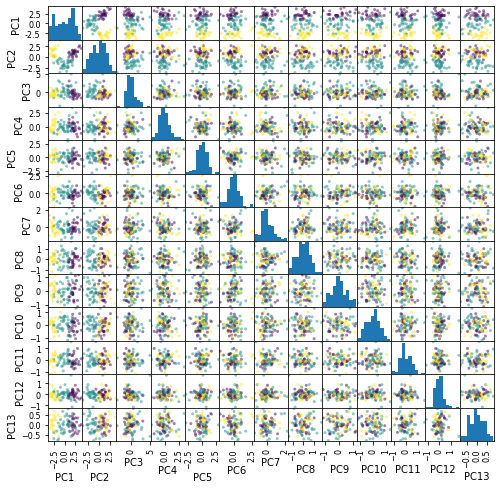

In [13]:
from pandas import plotting 
plotting.scatter_matrix(pd.DataFrame(feature, 
                        columns=["PC{}".format(x + 1) for x in range(len(dfs.columns))]), 
                        figsize=(8, 8), c=list(df.iloc[:, 0]), alpha=0.5) 
plt.show()

In [14]:
# 寄与率
pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,0
PC1,0.353685
PC2,0.196851
PC3,0.126736
PC4,0.070427
PC5,0.063435
PC6,0.046160
PC7,0.036236
PC8,0.026559
PC9,0.021900
PC10,0.019917


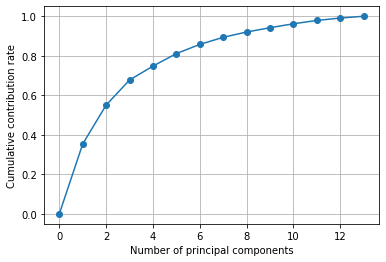

In [15]:
# 累積寄与率を図示する
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

In [16]:
# PCA の固有値
pd.DataFrame(pca.explained_variance_, index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,0
PC1,4.597902
PC2,2.559069
PC3,1.647566
PC4,0.915556
PC5,0.824655
PC6,0.600075
PC7,0.471072
PC8,0.345271
PC9,0.284699
PC10,0.258925


In [17]:
# PCA の固有ベクトル
pd.DataFrame(pca.components_, columns=df.columns[1:], index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
PC1,0.111490,-0.278253,0.009786,-0.212762,0.171816,0.385732,0.418967,-0.288763,0.310285,-0.075240,0.300964,0.377138,0.304638
PC2,0.454403,0.248720,0.370959,0.084658,0.203367,0.127362,0.056294,0.143253,0.141771,0.527437,-0.285768,-0.136187,0.327277
PC3,-0.329313,0.069581,0.536440,0.595304,0.053492,0.165297,0.165480,0.192418,0.150464,-0.168834,0.057335,0.216013,-0.221069
PC4,-0.025387,-0.179055,0.063965,0.125048,0.856438,-0.196115,-0.138808,-0.211486,-0.255826,-0.089470,0.111551,-0.159879,0.012942
PC5,-0.145913,0.341769,-0.165146,0.033704,0.124504,-0.066181,0.043095,-0.596283,0.363532,0.045181,-0.480323,0.136217,-0.269704
PC6,-0.283337,-0.607941,-0.138840,0.126048,-0.005031,-0.054751,-0.075994,0.091671,0.469379,0.438380,-0.040057,-0.277203,-0.082589
PC7,-0.133926,0.438279,-0.219818,-0.244904,0.322656,-0.071678,-0.043518,0.478715,0.501411,-0.150067,0.249408,-0.072281,0.003063
PC8,0.490820,0.049981,-0.156158,0.472925,-0.145604,-0.405657,-0.148766,-0.173710,0.249236,0.018727,0.433211,0.141782,-0.015704
PC9,-0.435669,0.356958,-0.143763,0.224934,-0.116174,0.136709,0.106457,-0.287405,-0.155568,0.263832,0.364632,-0.327238,0.389281
PC10,0.129118,0.029862,-0.565384,0.324643,0.175107,0.552411,-0.108827,0.205515,-0.203770,0.179689,-0.058320,0.225541,-0.198505


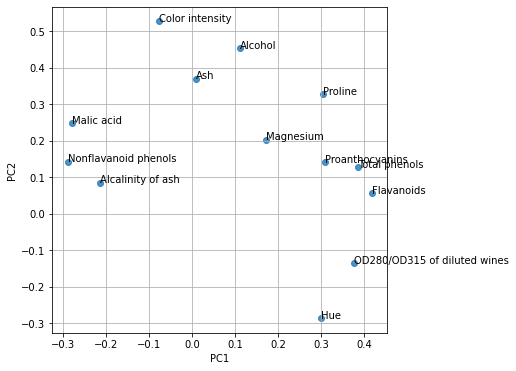

In [40]:
# 第一主成分と第二主成分における観測変数の寄与度をプロットする
plt.figure(figsize=(6, 6))
for x, y, name in zip(pca.components_[0], pca.components_[1], df.columns[1:]):
    # 変数ラベル
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# 3次元グラフで可視化

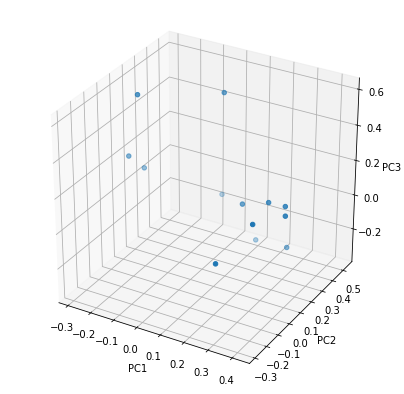

In [47]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

x = pca.components_[0]
y = pca.components_[1]
z = pca.components_[2]

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

ax.scatter(x, y, z)
plt.show()

# 演習

In [ ]:
# 演習
dfs = dfs[['Color intensity', 'Flavanoids', 'Alcohol', 'Proline']]

In [ ]:
# 主成分分析を実行してください
pca1 = PCA()
pca.fit(dfs)
# データを主成分空間に写像
feature = pca.transform(dfs)

In [ ]:
# 主成分得点
pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(dfs.columns))]).head()

,PC1,PC2,PC3,PC4
0,-0.778131,1.451878,0.859300,-0.281475
1,-1.651288,-0.673502,-0.267307,0.532522
2,0.607594,-0.801926,0.261188,0.122855
3,0.687761,-0.749089,-0.261819,-0.670017
4,0.129208,-0.885439,-0.260897,0.077270


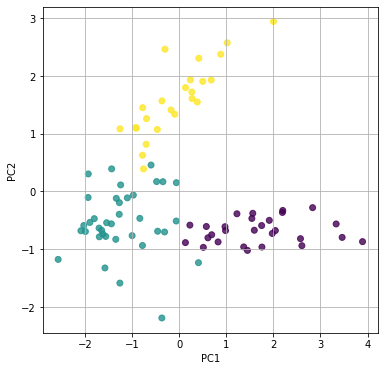

In [ ]:
# 第一主成分と第二主成分でプロットしてください
plt.figure(figsize=(6, 6))
# c=list(df.iloc[:, 0])の０はYのことは表している
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=list(df.iloc[:, 0]))
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

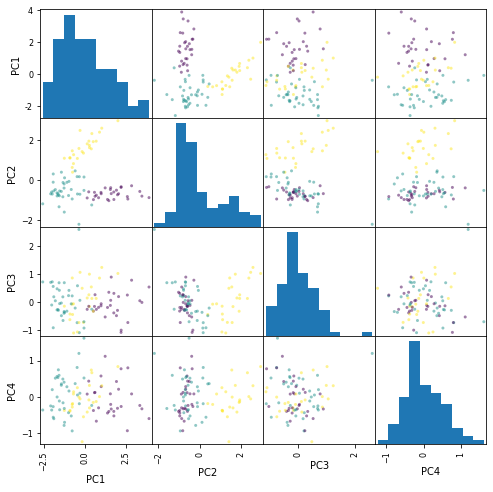

In [ ]:
# PC1〜PC4 で散布図行列を描いてください。
from pandas import plotting 
plotting.scatter_matrix(pd.DataFrame(feature, 
                        columns=["PC{}".format(x + 1) for x in range(len(dfs.columns))]), 
                        figsize=(8, 8), c=list(df.iloc[:, 0]), alpha=0.5) 
plt.show()

In [ ]:
# 寄与率を計算してください。
# 寄与率
pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,0
PC1,0.539161
PC2,0.301505
PC3,0.094402
PC4,0.064932


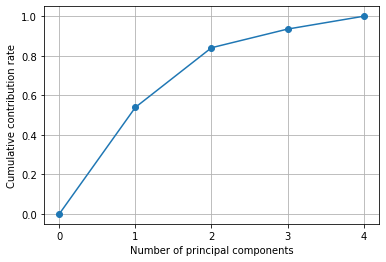

In [ ]:
# 累積寄与率を図示してください。
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

In [ ]:
# 各主成分の固有値を計算してください。
# PCA の固有値
pd.DataFrame(pca.explained_variance_, index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,0
PC1,2.156643
PC2,1.206022
PC3,0.377609
PC4,0.259727


In [ ]:
# 各主成分の固有ベクトルを計算してください。
# PCA の固有ベクトル
pd.DataFrame(pca.components_, columns=df.columns[1:5], index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,Alcohol,Malic acid,Ash,Alcalinity of ash
PC1,0.436323,0.333010,0.582551,0.599468
PC2,0.585560,-0.735953,0.234873,-0.245616
PC3,0.681043,0.383920,-0.613186,-0.113087
PC4,0.054054,0.447306,0.479033,-0.753341


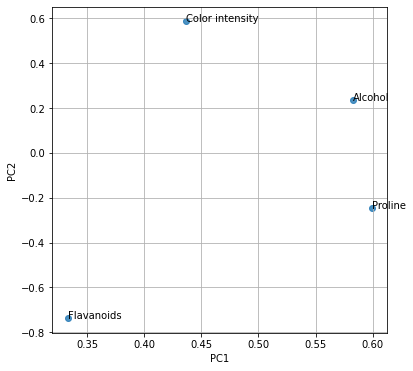

In [ ]:
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(6, 6))
for x, y, name in zip(pca.components_[0], pca.components_[1], ['Color intensity', 'Flavanoids', 'Alcohol', 'Proline']):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()